In [1]:
%load_ext autoreload
%autoreload 2
import MDAnalysis
import mdtraj
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from MDAnalysis.tests.datafiles import GRO, XTC #test GROMACS data for examples below

In [3]:
#iterate through test trajectory and track the maximum and minimum distance between all pairs of CA particles using MDAnalysis
u = MDAnalysis.Universe(GRO, XTC) #create Universe object
CA_selection = u.select_atoms('name CA') #this selection will update automatically as we move through trajectory
#place results in these lists as we iterate through trajectory:
list_max_distances = [] 
list_min_distances = []

for ts in u.trajectory:
    CA_coordinates = CA_selection.coordinates() #expose numpy array of coords
    distance_matrix = scipy.spatial.distance.cdist(CA_coordinates, CA_coordinates)
    maximum_distance = distance_matrix.max()
    minimum_distance = distance_matrix[distance_matrix != 0].min()
    list_max_distances.append(maximum_distance)
    list_min_distances.append(minimum_distance)
    print 'frame:', ts.frame

frame: 0
frame: 1
frame: 2
frame: 3
frame: 4
frame: 5
frame: 6
frame: 7
frame: 8
frame: 9


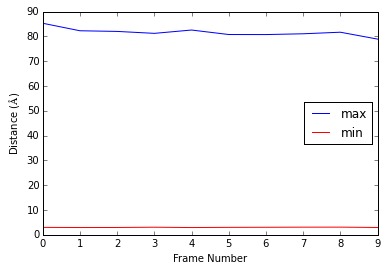

In [4]:
#plot results from MDAnalysis:
fig_MDA = plt.figure()
ax = fig_MDA.add_subplot(111)
ax.plot(np.arange(u.trajectory.n_frames), list_max_distances, c= 'blue', label = 'max')
ax.plot(np.arange(u.trajectory.n_frames), list_min_distances, c= 'red', label = 'min')
ax.set_xlabel('Frame Number')
ax.set_ylabel('Distance ($\AA$)')
ax.legend(loc=5)

In [5]:
#repeat the trajectory analysis using MDTraj (probably not the optimal way to do it--my first time using MDtraj !)
t = mdtraj.load(XTC, top = GRO)
topology  = t.topology
list_max_distances = []
list_min_distances = []

for ts in t:
    CA_indices = ts.topology.select('name CA')
    CA_coords = ts.xyz[0][CA_indices]
    distance_matrix = scipy.spatial.distance.cdist(CA_coords, CA_coords)
    max_distance = distance_matrix.max()
    min_distance = distance_matrix[distance_matrix != 0].min()
    list_max_distances.append(max_distance)
    list_min_distances.append(min_distance)
    print 'time:', ts._time

time: [ 0.]
time: [ 100.00000763]
time: [ 200.00001526]
time: [ 300.]
time: [ 400.00003052]
time: [ 500.00003052]
time: [ 600.]
time: [ 700.00006104]
time: [ 800.00006104]
time: [ 900.00006104]


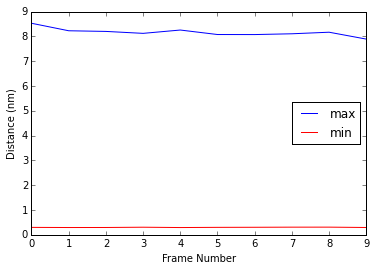

In [6]:
#plot mdtraj results
fig_mdtraj = plt.figure()
ax = fig_mdtraj.add_subplot(111)
ax.plot(np.arange(t.n_frames), list_max_distances, c= 'blue', label = 'max')
ax.plot(np.arange(t.n_frames), list_min_distances, c= 'red', label = 'min')
ax.set_xlabel('Frame Number')
ax.set_ylabel('Distance (nm)')
ax.legend(loc=5)


In [7]:
#the results are the same, apart from MDTraj not converting the distance units like MDAnalysis does